In [1]:
import pandas as pd

C:\Users\srira\AppData\Local\Temp\ipykernel_11480\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data=pd.read_excel("Online Retail.xlsx")

In [4]:
# Drop missing values and remove negative values
data.dropna(subset=["InvoiceNo", "StockCode", "Description", "CustomerID"], inplace=True)
data = data[(data["Quantity"] > 0) & (data["UnitPrice"] > 0)]

In [6]:
# Convert InvoiceNo to string
data["InvoiceNo"] = data["InvoiceNo"].astype(str)

In [7]:
# Extract transactions (grouping items by InvoiceNo)
transactions = data.groupby("InvoiceNo")["Description"].apply(list).tolist()

In [8]:
# Display a few transactions
print(transactions[:5])

[['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER'], ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION'], ['BATH BUILDING BLOCK WORD']]


In [9]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [10]:
# Convert transactions into a format suitable for FP-Growth
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [11]:
# Apply FP-Growth Algorithm
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

In [12]:
# Display frequent itemsets
print(frequent_itemsets)

      support                                           itemsets
0    0.106357               (WHITE HANGING HEART T-LIGHT HOLDER)
1    0.017321                   (RED WOOLLY HOTTIE WHITE HEART.)
2    0.017213              (KNITTED UNION FLAG HOT WATER BOTTLE)
3    0.016026                     (SET 7 BABUSHKA NESTING BOXES)
4    0.013005                   (CREAM CUPID HEARTS COAT HANGER)
..        ...                                                ...
968  0.010792  (LUNCH BAG  BLACK SKULL., LUNCH BAG VINTAGE DO...
969  0.010253  (LUNCH BAG SPACEBOY DESIGN , LUNCH BAG VINTAGE...
970  0.010199  (LUNCH BAG SUKI DESIGN , LUNCH BAG VINTAGE DOI...
971  0.011763  (LOVE HOT WATER BOTTLE, HOT WATER BOTTLE KEEP ...
972  0.010954  (HAND WARMER OWL DESIGN, HAND WARMER RED LOVE ...

[973 rows x 2 columns]


In [13]:
from mlxtend.frequent_patterns import association_rules

In [34]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

In [35]:
# Display the top 5 rules
print(rules.head())

                       antecedents                           consequents  \
0         (HAND WARMER OWL DESIGN)              (HAND WARMER UNION JACK)   
1         (HAND WARMER UNION JACK)              (HAND WARMER OWL DESIGN)   
2  (HAND WARMER SCOTTY DOG DESIGN)              (HAND WARMER UNION JACK)   
3         (HAND WARMER UNION JACK)       (HAND WARMER SCOTTY DOG DESIGN)   
4       (HOME BUILDING BLOCK WORD)  (WHITE HANGING HEART T-LIGHT HOLDER)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.030866            0.023797  0.011278    0.365385  15.354439   
1            0.023797            0.030866  0.011278    0.473923  15.354439   
2            0.025415            0.023797  0.010253    0.403397  16.951822   
3            0.023797            0.025415  0.010253    0.430839  16.951822   
4            0.037287            0.106357  0.011278    0.302460   2.843832   

   representativity  leverage  conviction  zhangs_metric   jaccard  certai

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [37]:
# Prepare dataset for ML (features: antecedent size, consequent size, support, lift)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
X = rules[["antecedent_len", "consequent_len", "support", "lift"]]
y = (rules["confidence"] > 0.5).astype(int)  # Label: High confidence (1) or Low confidence (0)


In [38]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.80


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Get the top 10 purchased products
top_products = data["Description"].value_counts().head(10)

C:\Users\srira\AppData\Local\Temp\ipykernel_11480\857320259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


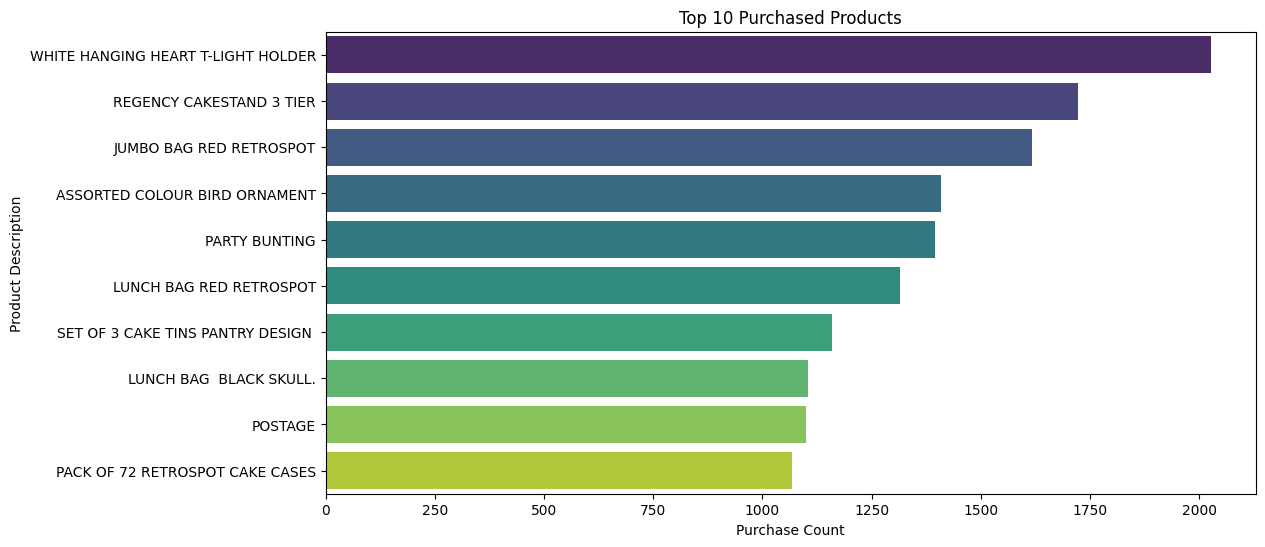

In [43]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Purchase Count")
plt.ylabel("Product Description")
plt.title("Top 10 Purchased Products")
plt.show()

C:\Users\srira\AppData\Local\Temp\ipykernel_11480\2368559043.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequent_itemsets["support"][:10], y=frequent_itemsets["itemsets"][:10].astype(str), palette="coolwarm")


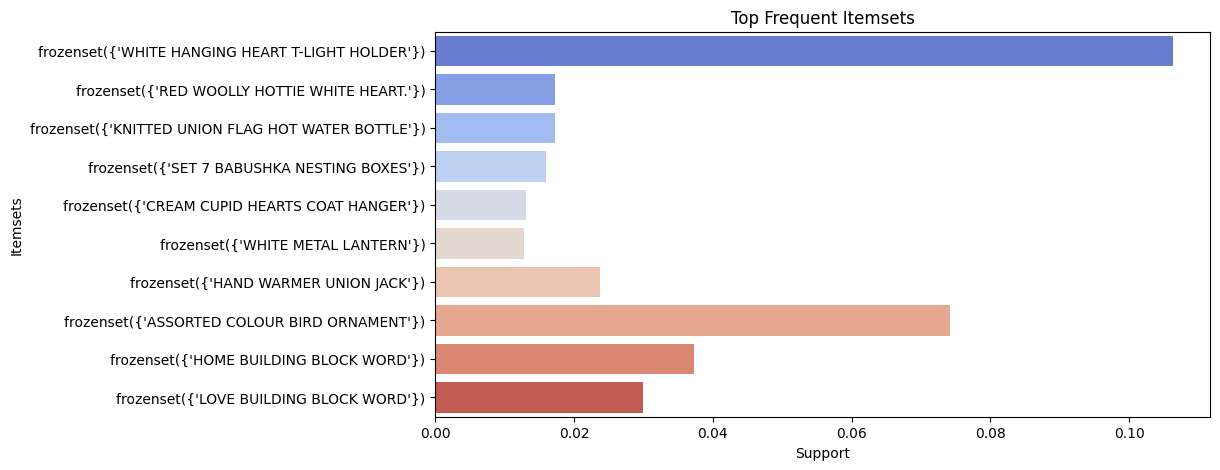

In [44]:
# Plot support values of frequent itemsets
plt.figure(figsize=(10, 5))
sns.barplot(x=frequent_itemsets["support"][:10], y=frequent_itemsets["itemsets"][:10].astype(str), palette="coolwarm")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.title("Top Frequent Itemsets")
plt.show()

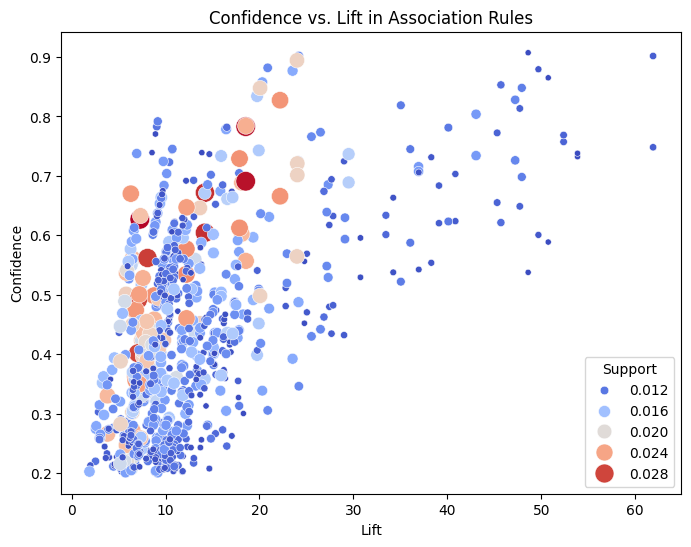

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rules["lift"], y=rules["confidence"], hue=rules["support"], size=rules["support"], palette="coolwarm", sizes=(20, 200))
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.title("Confidence vs. Lift in Association Rules")
plt.legend(title="Support")
plt.show()

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
# Generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       107
           1       0.73      0.68      0.70        59

    accuracy                           0.80       166
   macro avg       0.78      0.77      0.77       166
weighted avg       0.79      0.80      0.79       166



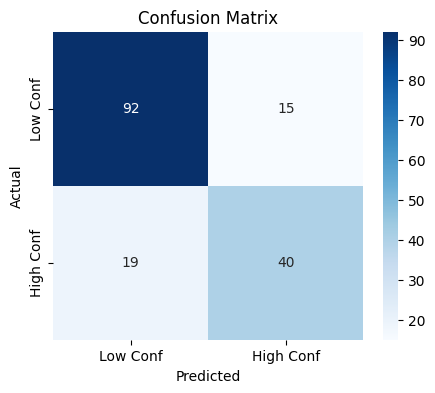

In [48]:
# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=["Low Conf", "High Conf"], yticklabels=["Low Conf", "High Conf"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [49]:
import random

In [50]:
def recommend_items(basket, rules, n_recommendations=3):
    matching_rules = rules[rules["antecedents"].apply(lambda x: any(item in x for item in basket))]
    
    if matching_rules.empty:
        return ["No recommendations"]
    
    sorted_rules = matching_rules.sort_values(by="confidence", ascending=False)
    recommendations = sorted_rules["consequents"].values[:n_recommendations]
    
    return list(random.choice(recommendations))

In [51]:
# Example usage
user_basket = ["WHITE HANGING HEART T-LIGHT HOLDER", "WHITE METAL LANTERN"]
print(f"Recommended products: {recommend_items(user_basket, rules)}")

Recommended products: ['RED HANGING HEART T-LIGHT HOLDER']


In [52]:
# Calculate FP-Growth only accuracy (baseline)
fp_only_accuracy = (rules["confidence"] > 0.5).mean()  # Fraction of rules with confidence > 0.5

# Random Forest Model Accuracy (already computed in the user's code)
rf_accuracy = accuracy

# Store results in a dictionary for comparison
accuracy_comparison = {
    "FP-Growth Only Accuracy": fp_only_accuracy,
    "FP-Growth + ML Accuracy": rf_accuracy
}

print(accuracy_comparison)


{'FP-Growth Only Accuracy': 0.330518697225573, 'FP-Growth + ML Accuracy': 0.7951807228915663}
